## Libraries

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Simple Data

In [52]:
np.random.seed(42) 
A = np.array ([ [ 1 , 2.0], [ 1 , 3.0], [ 1 , 4.5], [ 1 , 5.5] ]) 
y = np.array ([ [ 3.1], [ 4.9], [ 8.2], [ 10.1] ] ) 
m = len(y)

## Find $\theta$

In [53]:
# Normal
theta_normal = np.linalg.inv(A.T @ A) @ A.T @ y
print("Theta Normal:")
print(theta_normal)

# BGD
theta_BGD = np.zeros((2,1))
learning_rate = 0.01
n_iterations = 1000
for i in range(n_iterations):                                            
    grad = (1/m) * (A.T @ (A @ theta_BGD - y))           
    theta_BGD = theta_BGD - learning_rate * grad     
print("Theta BGD:")        
print(theta_BGD)

# SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)
A_pinv = Vt.T @ np.diag(1 / S) @ U.T
theta_svd = A_pinv @ y
print("Theta SVD:")
print(theta_svd)

Theta Normal:
[[-1.04137931]
 [ 2.03103448]]
Theta BGD:
[[-0.55217831]
 [ 1.9146829 ]]
Theta SVD:
[[-1.04137931]
 [ 2.03103448]]


## Noisy Data

In [54]:
noise = np.random.rand(m, 1) * 0.0001 
A_collinear = np. hstack((A, A[: , [1]] + noise))

## Find $\theta$

In [55]:
# Normal
theta_normal = np.linalg.inv(A_collinear.T @ A_collinear) @ A_collinear.T @ y
print("Theta Normal:")
print(theta_normal)

# SVD
U, S, Vt = np.linalg.svd(A_collinear, full_matrices=False)
A_pinv = Vt.T @ np.diag(1 / S) @ U.T
theta_svd = A_pinv @ y
print("Theta SVD:")
print(theta_svd)

Theta Normal:
[[-8.53802729e-01]
 [ 3.43828068e+03]
 [-3.43623883e+03]]
Theta SVD:
[[-8.53775599e-01]
 [ 3.43826298e+03]
 [-3.43622113e+03]]


## Load Data

In [56]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
    'Acceleration', 'ModelYear', 'Origin', 'CarName']

data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)
data_mpg = data_mpg.dropna(subset=['Horsepower'])
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

print(data_mpg.head())

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   Origin                    CarName  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


## Build Matrix

In [57]:
Horsepower = data_mpg['Horsepower'].values.reshape(-1, 1)

scaler = StandardScaler()
Horsepower_scaled = scaler.fit_transform(Horsepower)
A = np.hstack([np.ones((len(Horsepower_scaled), 1)), Horsepower_scaled])
y = data_mpg['MPG'].values.reshape(-1, 1)

In [58]:
def compute_cost(A, theta, y):
    m = len(y)
    return (1/m) * np.sum((A @ theta - y)**2)

def compute_grad(A, theta, y):
    m = len(y)
    return (2/m) * (A.T @ (A @ theta - y))

In [59]:
# SGD
m, n = A.shape
theta_SGD = np.zeros((n, 1))

learning_rate = 0.01
n_iterations = 5000

cost_SGD = []

for it in range(n_iterations):

    i = np.random.randint(0, m)
    Ai = A[i].reshape(1, -1)
    yi = y[i]
    grad_i = Ai.T @ (Ai @ theta_SGD - yi)
    theta_SGD = theta_SGD - learning_rate * grad_i
    cost_SGD.append(compute_cost(A, theta_SGD, y))

In [60]:
# BGD
theta_BGD = np.zeros((n, 1))

learning_rate = 0.01
n_iterations = 1000

cost_BGD = []

for it in range(n_iterations):
    grad = compute_grad(A, theta_BGD, y)
    theta_BGD = theta_BGD - learning_rate * grad
    cost_BGD.append(compute_cost(A, theta_BGD, y))

## Comparison Plot

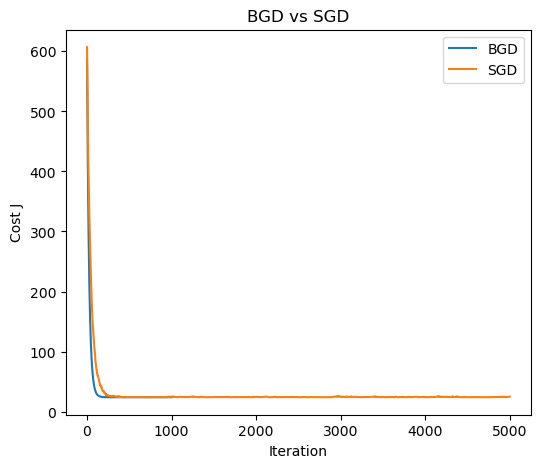

In [61]:
plt.figure(figsize=(6,5))
plt.plot(cost_BGD, label='BGD')
plt.plot(cost_SGD, label='SGD')
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.legend()
plt.title("BGD vs SGD")
plt.savefig('compare.pdf', format = 'pdf')
plt.show()

## Nonlinear Regression

In [64]:
x = Horsepower_scaled
A_poly = np.hstack([np.ones((len(x), 1)), x, x**2])

In [65]:
# BGD
m, n = A_poly.shape
theta_poly_BGD = np.zeros((n, 1))

learning_rate = 0.01
n_iterations = 1000

cost_poly_BGD = []

for it in range(n_iterations):
    grad = compute_grad(A_poly, theta_poly_BGD, y)
    theta_poly_BGD = theta_poly_BGD - learning_rate * grad
    cost_poly_BGD.append(compute_cost(A_poly, theta_poly_BGD, y))


In [66]:
# SGD
theta_poly_SGD = np.zeros((n, 1))
cost_poly_SGD = []

for it in range(n_iterations):
    i = np.random.randint(0, m)
    Ai = A_poly[i].reshape(1, -1)
    yi = y[i]
    grad_i = 2 * Ai.T @ (Ai @ theta_poly_SGD - yi)
    theta_poly_SGD = theta_poly_SGD - learning_rate * grad_i
    
    cost_poly_SGD.append(compute_cost(A_poly, theta_poly_SGD, y))
print(theta_poly_SGD)

[[21.12210933]
 [-8.57433326]
 [ 2.53881587]]


## Regression Plot

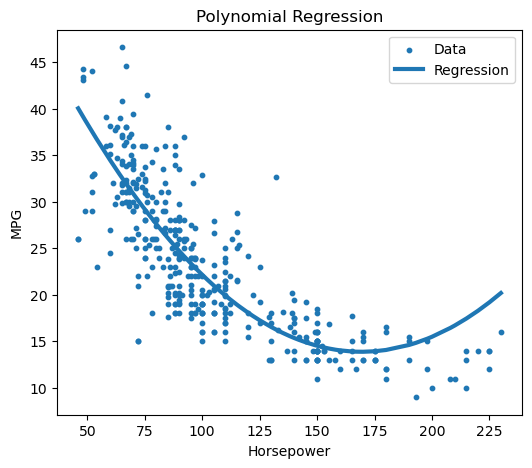

In [67]:
x_plot = np.sort(Horsepower.reshape(-1, 1), axis=0)
x_plot_scaled = scaler.transform(x_plot)

A_plot = np.hstack([np.ones((len(x_plot_scaled), 1)), x_plot_scaled, x_plot_scaled**2])

y_pred = A_plot @ theta_poly_SGD

plt.figure(figsize=(6,5))
plt.scatter(Horsepower, data_mpg['MPG'], s=10, label="Data")
plt.plot(x_plot, y_pred, linewidth=3, label="Regression")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.title("Polynomial Regression")
plt.savefig('Regression.pdf', format = 'pdf')
plt.show()
